In [1]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
import itertools
from IPython.display import Image
from tensorflow import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [2]:
test = pn.read_csv(r'C:\Users\sushmitha\Downloads\archive (5)\sign_mnist_test.csv')
train = pn.read_csv(r'C:\Users\sushmitha\Downloads\archive (5)\sign_mnist_train.csv')

In [3]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
test.tail(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
7166,12,169,173,177,181,183,186,189,191,194,...,36,27,14,35,40,15,8,27,42,41
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63
7171,2,173,174,173,174,173,173,175,175,174,...,201,200,197,198,198,197,195,195,193,192


In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93
27454,23,179,180,180,180,182,181,182,183,182,...,108,132,170,194,214,203,197,205,209,215


In [7]:
train.shape

(27455, 785)

In [8]:
test.shape

(7172, 785)

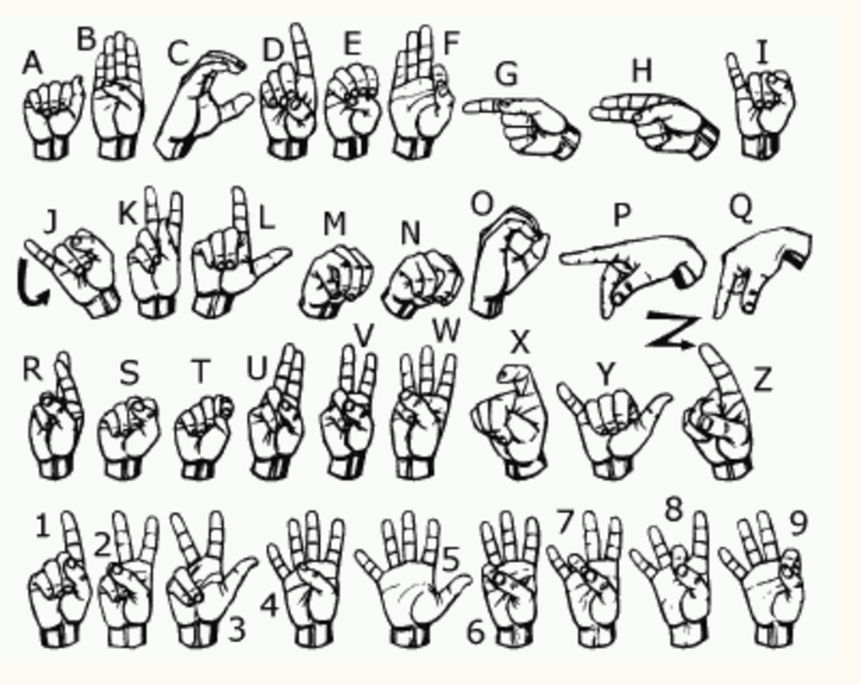

In [9]:
Image(r'C:\Users\sushmitha\Pictures\Screenshots\Screenshot 2023-05-22 111005.png')

In [10]:
labels = train['label'].values

In [11]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

# graphs(count plots)

<Axes: ylabel='count'>

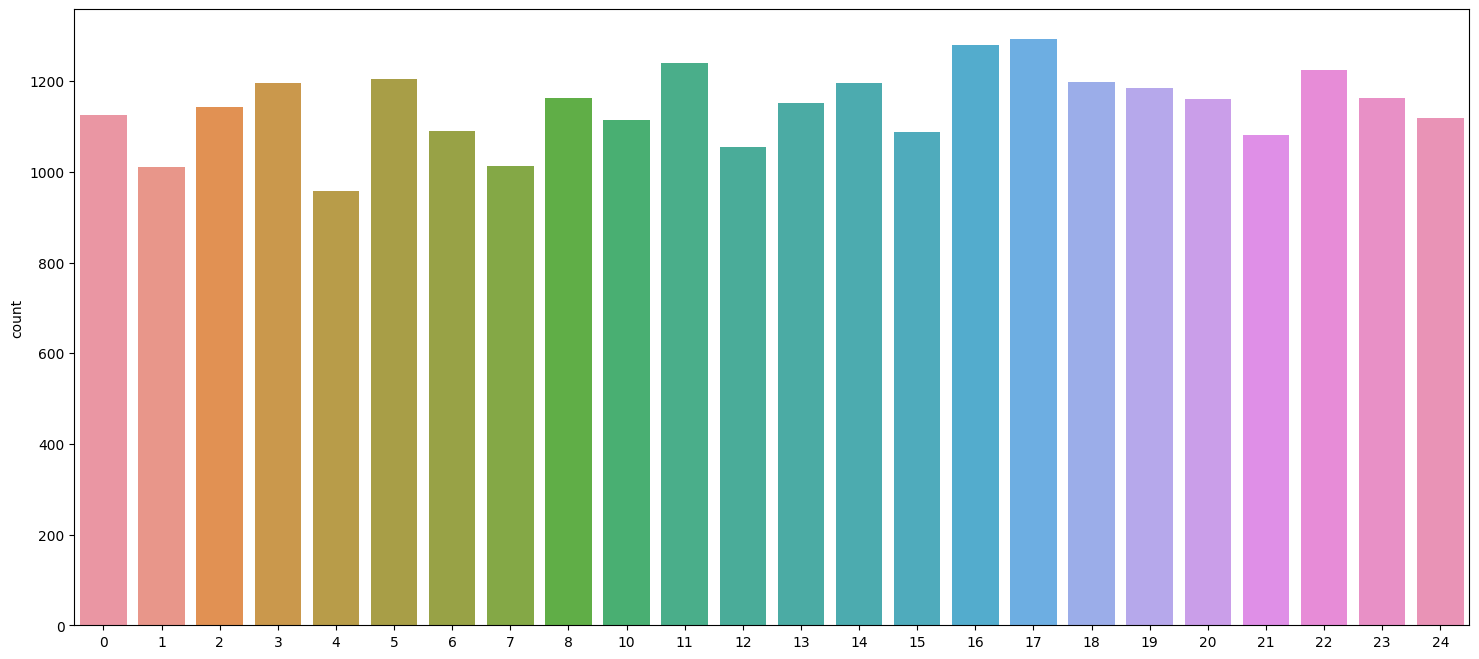

In [12]:
plt.figure(figsize = (18,8))
sns.countplot( x = labels)

In [13]:
train.drop('label', axis = 1, inplace = True)

# Reshaping the images

In [14]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [15]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [16]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

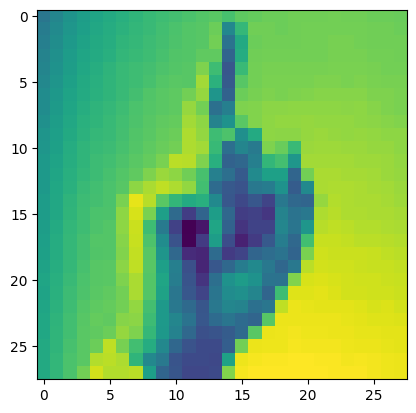

In [17]:
plt.imshow(images[0].reshape(28,28))

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

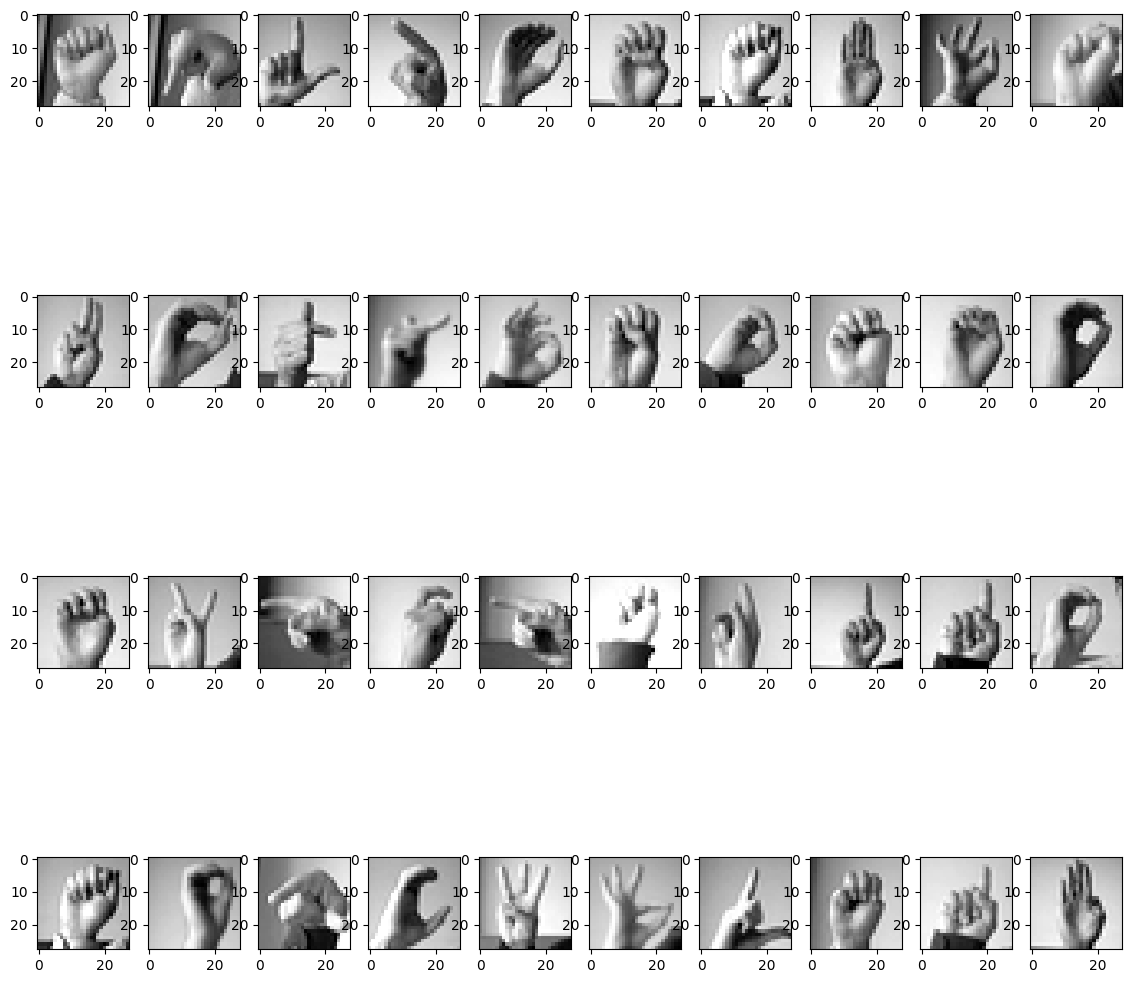

In [20]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
plt.show()


# how the image look

In [21]:
batch_size = 128
num_classes = 24
epochs = 50

In [22]:
x_train = x_train / 255
x_test = x_test / 255

In [23]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [24]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [25]:
!pip install keras

In [26]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [27]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 32, batch_size = 200)

Epoch 1/32
97/97 [==============================] - 13s 126ms/step - loss: 2.9227 - accuracy: 0.1164 - val_loss: 2.3246 - val_accuracy: 0.2875
Epoch 2/32
97/97 [==============================] - 8s 87ms/step - loss: 1.8489 - accuracy: 0.3952 - val_loss: 1.3058 - val_accuracy: 0.6139
Epoch 3/32
97/97 [==============================] - 13s 138ms/step - loss: 1.1689 - accuracy: 0.6055 - val_loss: 0.8900 - val_accuracy: 0.7154
Epoch 4/32
97/97 [==============================] - 14s 148ms/step - loss: 0.8174 - accuracy: 0.7212 - val_loss: 0.5866 - val_accuracy: 0.8219
Epoch 5/32
97/97 [==============================] - 13s 138ms/step - loss: 0.6107 - accuracy: 0.7897 - val_loss: 0.4729 - val_accuracy: 0.8468
Epoch 6/32
97/97 [==============================] - 13s 135ms/step - loss: 0.4702 - accuracy: 0.8403 - val_loss: 0.3162 - val_accuracy: 0.9153
Epoch 7/32
97/97 [==============================] - 14s 141ms/step - loss: 0.3487 - accuracy: 0.8857 - val_loss: 0.2306 - val_accuracy: 0.9349
E

# model summary

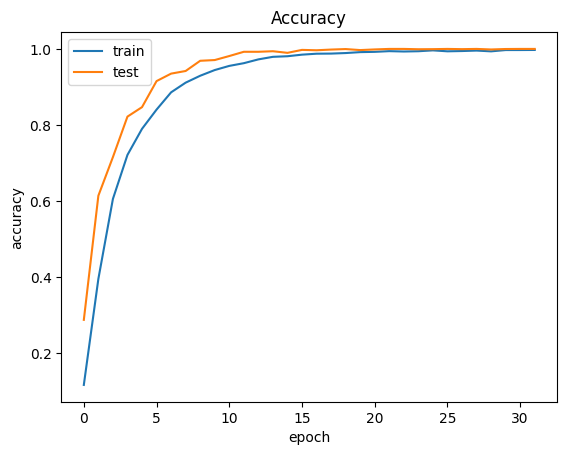

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [29]:
test_labels = test['label']

In [30]:
test.drop('label', axis = 1, inplace = True)

In [31]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [32]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [33]:
test_images.shape

(7172, 28, 28, 1)

In [34]:
y_pred = model.predict(test_images)

225/225 [==============================] - 1s 4ms/step
